In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import re
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score 

In [2]:
df = pd.read_csv("/Users/admin/Downloads/SPAM text message 20170820 - Data.csv")

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


/Users/admin/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/admin/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/admin/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Category', ylabel='count'>

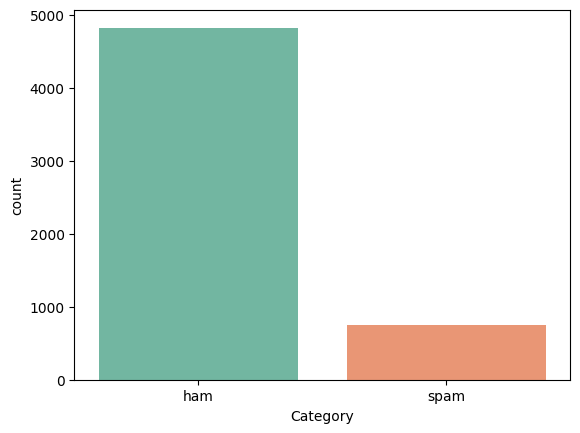

In [4]:
sns.countplot(x='Category', data=df, palette="Set2")

In [5]:
def cleaning(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text) #видалення силок
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-ZáéíóúÁÉÍÓÚ']", ' ', text) #залишити тільки символи
    text = re.sub(r"\s+[^a-zA-ZáéíóúÁÉÍÓÚ']\s+", ' ', text) # залишити символи довжиною > 1
    text = "".join([txt for txt in text if txt not in string.punctuation])

    text = word_tokenize(text)
    stop_word = nltk.corpus.stopwords.words("english")
    text = " ".join([txt for txt in text if txt not in stop_word])
    text= re.sub("\s[\s]+", " ",text).strip() #видалення пробілів
    text= re.sub("\s[\s]+", " ",text).strip()

    return text

In [6]:
df['Message'] = df['Message'].apply(cleaning)

In [7]:
df['Category'] = df['Category'].replace({'ham': 0, 'spam': 1}) # перетворення категорій в бінарний вигляд

In [8]:
def lemm(data):
    lemmanized = []
    wnl = WordNetLemmatizer()
    for i in range(len(df)):
        tokenz = word_tokenize(data['Message'].iloc[i])
        lemmed = []
        for word in tokenz:
           lemmed.append(wnl.lemmatize(word))
        lemmanized.append(lemmed)
    data['lemmanized'] = lemmanized
    data['text'] = data['lemmanized'].apply(" ".join)
    data.drop('lemmanized', axis=1)
    data.drop('Message', axis=1)
    return data

In [9]:
df = lemm(df)

In [10]:
df.head()

,Category,Message,lemmanized,text
0,0,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...,"[free, entry, wkly, comp, win, fa, cup, final,...",free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say,"[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say
4,0,nah dont think goes usf lives around though,"[nah, dont, think, go, usf, life, around, though]",nah dont think go usf life around though


In [11]:
clas0, clas1 = df["Category"].value_counts()
df0 = df[df["Category"]==0]
df1 = df[df["Category"]==1]
df1 = df1.sample(clas0,replace=True) # зрівняння кількості значень
data = pd.concat([df0,df1])

In [12]:
labels = df['Category']
data = df['text']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)

In [14]:
X_train

1978    reply win weekly fifa world cup held send stop...
3989    hello sort town already dont rush home eating ...
3935                        come guoyang go n tell u told
4078    hey sathya till dint meet even single time saw...
4086    orange brings ringtones time chart hero free h...
                              ...                        
3772    hi wlcome back wonder got eaten lion something...
5191                                 sorry ill call later
5226             prabha im soryda realy frm heart im sory
5390                             nt joking seriously told
860                              say somebody named tampa
Name: text, Length: 4457, dtype: object

In [15]:
tfv = TfidfVectorizer() # трансформація в вектори
X_train = tfv.fit_transform(X_train)
X_test = tfv.transform(X_test)

In [16]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
preds = lr.predict(X_test)
print(accuracy_score(preds,y_test))

0.9650224215246637


In [17]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(pred, y_test)

0.967713004484305

In [18]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict = rfc.predict(X_test)
accuracy_score(predict, y_test)

0.9748878923766816

In [19]:
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
predict = gnb.predict(X_test.toarray())
accuracy_score(predict, y_test)

0.885201793721973

In [20]:
svc = SVC()
svc.fit(X_train, y_train)
predict = svc.predict(X_test)
accuracy_score(predict, y_test)

0.9811659192825112